In [ ]:
!pip install kaggle
!pip install mne scipy
!pip install pyqt5

import scipy.io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mne
import pathlib

matplotlib.use('Agg')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 14.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
 import os

# Set the path to the "fif-Enrollment" folder
folder_path = '/content/drive/My Drive/M3CV/fif-Enrollment'
sample_data_dir = pathlib.Path(folder_path)
sample_data_dir

# Load the .fif file
raw_path = sample_data_dir / 'epoch000019.fif'
raw = mne.io.read_raw_fif(raw_path, preload=True)



Opening raw data file /content/drive/My Drive/M3CV/fif-Enrollment/epoch000019.fif...


<ipython-input-4-4383e64205ec>:10: RuntimeWarning: This filename (/content/drive/My Drive/M3CV/fif-Enrollment/epoch000019.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


Isotrak not found
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Reading 0 ... 999  =      0.000 ...     3.996 secs...


In [ ]:
raw.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 64 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 65
 projs: []
 sfreq: 250.0 Hz
>

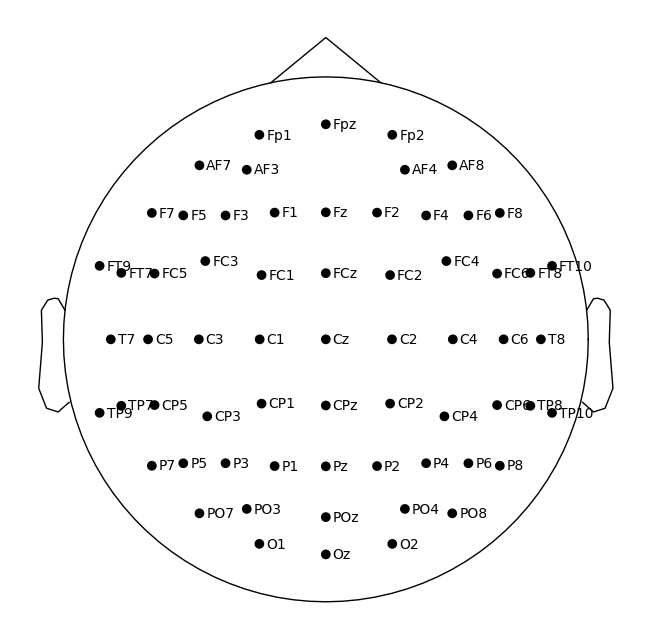

In [ ]:
# Set the channel types, assuming 'Marker' is already present
raw.set_channel_types({'Marker': 'stim'})

# Set the montage (using 'easycap-M1' as an example)
montage = mne.channels.make_standard_montage('easycap-M1')
raw.set_montage(montage)
raw.plot_sensors(show_names=True)

In [ ]:
import plotly.graph_objs as go

# Get sensor positions
pos = montage.get_positions()['ch_pos']
x = [p[0] for p in pos.values()]
y = [p[1] for p in pos.values()]
z = [p[2] for p in pos.values()]
labels = list(pos.keys())

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers+text', text=labels)])
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show()

1 event found on stim channel Marker
Event IDs: [3]
Using matplotlib as 2D backend.


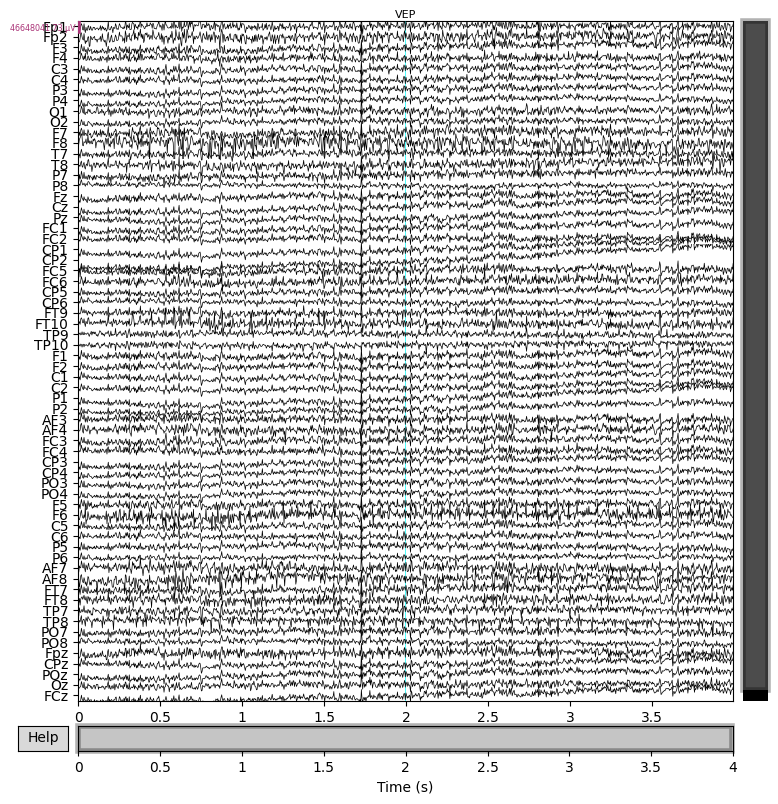

In [ ]:
# Find events in the 'Marker' channel
events = mne.find_events(raw, stim_channel='Marker')

# Plot the data with events
event_id = {"VEP": 3, "AEP": 4, "SEP": 5}
raw.plot(n_channels=64, scalings='auto', events=events, event_id=event_id, title='EEG Data with Events', show=True, block=True)


In [ ]:
raw

<Raw | epoch000019.fif, 65 x 1000 (4.0 s), ~604 kB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 111 samples (0.444 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


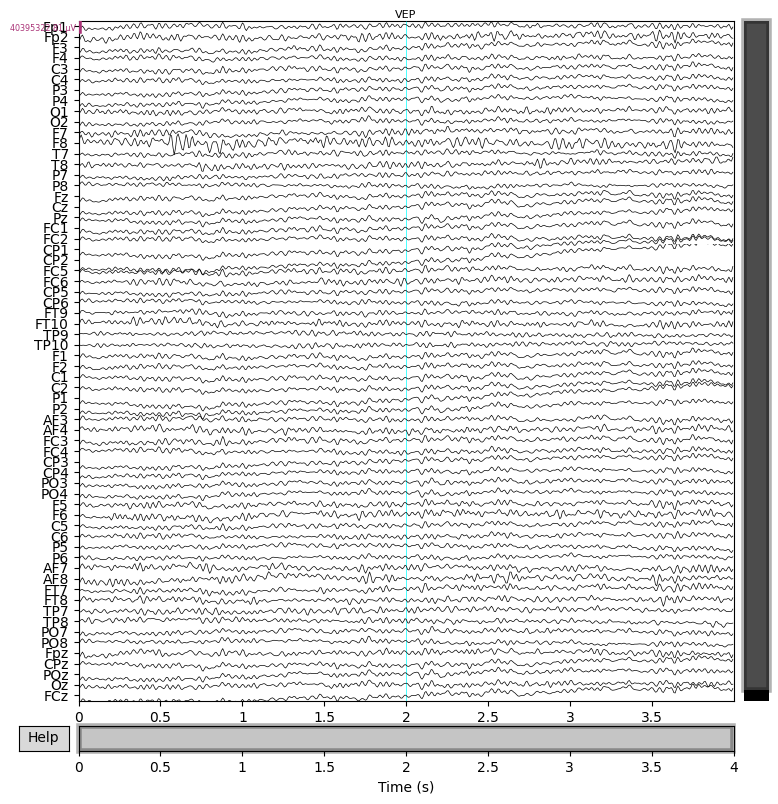

In [ ]:
raw_filter = raw.copy().filter(l_freq=None, h_freq=30)
raw_filter.plot(n_channels=64, scalings='auto', events=events, event_id=event_id, title='Low Pass Filter', show=True, block=True)